In [0]:
#installing kaggle
pip install -q kaggle

In [2]:
#uploading the kaggle.json file
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dhamodaran123","key":"3a678089031568ee9c36043ef4e733d6"}'}

In [0]:
#making a new directory called kaggle
!mkdir ~/.kaggle

In [0]:
#copying the kaggle.json to the kaggle directory
!cp kaggle.json ~/.kaggle/

In [0]:
#changing the access mode of the file
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
#listing out the kaggle datasets published for compitetions
!kaggle datasets list

ref                                                            title                                                size  lastUpdated          downloadCount  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
allen-institute-for-ai/CORD-19-research-challenge              COVID-19 Open Research Dataset Challenge (CORD-19)    1GB  2020-04-03 22:53:52          45918  
roche-data-science-coalition/uncover                           UNCOVER COVID-19 Challenge                          123MB  2020-04-08 22:04:30           1935  
fireballbyedimyrnmom/us-counties-covid-19-dataset              US counties COVID 19 dataset                        334KB  2020-04-08 21:53:06           2204  
ryanxjhan/cbc-news-coronavirus-articles-march-26               CBC News Coronavirus/COVID-19 Articles (NLP)          6MB  2020-03-27 23:23:07            493  
bappekim/air-pollution-in-seoul               

In [7]:
#downloading the reauired image dataset from kaggle
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:27<00:00, 38.2MB/s]
100% 2.29G/2.29G [00:27<00:00, 90.0MB/s]


In [8]:
#manual extraction the data drom the zipfile(in the later of the project i have used keras automated data extraction from the directories and data generation so need to do these things ) 
#all these steps until importing keras are done only for example so need to include these things 
#Unzipping the downloaded file
from zipfile import ZipFile
file_name='chest-xray-pneumonia.zip'
with ZipFile(file_name,'r') as zip_file:
  zip_file.printdir()
  print("Extracting all the files now :)")
  zip_file.extractall()
print("Done")

Streaming output truncated to the last 5000 lines.
chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg 2019-09-28 16:38:48       417591
chest_xray/train/NORMAL/IM-0437-0001.jpeg      2019-09-28 16:38:48       453170
chest_xray/train/NORMAL/IM-0438-0001.jpeg      2019-09-28 16:38:48       622571
chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg 2019-09-28 16:38:48       582062
chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg 2019-09-28 16:38:48       397121
chest_xray/train/NORMAL/IM-0439-0001.jpeg      2019-09-28 16:38:48       712122
chest_xray/train/NORMAL/IM-0440-0001.jpeg      2019-09-28 16:38:48       578419
chest_xray/train/NORMAL/IM-0441-0001.jpeg      2019-09-28 16:38:48       405149
chest_xray/train/NORMAL/IM-0442-0001.jpeg      2019-09-28 16:38:48       592346
chest_xray/train/NORMAL/IM-0444-0001.jpeg      2019-09-28 16:38:48       767649
chest_xray/train/NORMAL/IM-0445-0001.jpeg      2019-09-28 16:38:48       633004
chest_xray/train/NORMAL/IM-0446-0001.jpeg      2019-09-28 16:38:48   

In [9]:
#listing out the contents of the the unzipped file
import os
os.listdir('chest_xray')

['train', 'test', 'val', 'chest_xray', '__MACOSX']

In [10]:
#changing the working directory
os.chdir('chest_xray')
os.getcwd()
os.listdir()

['train', 'test', 'val', 'chest_xray', '__MACOSX']

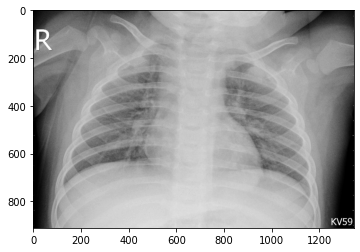

In [0]:
#a sample code to view the image of the downloaded data
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
path='train/PNEUMONIA'
Img=[]
for files in os.listdir(path):
  files=path+ '/' +files
  img=Image.open(files)
  img=np.array(img,'uint8')
  Img=img
plt.imshow(Img,cmap='gray')

In [0]:
#extracting the training data
x_train=[]
y_train=[]
for root,dir_,files in os.walk('train'):
  for file in files:
    img_path=os.path.join(root,file)
    identifier=os.path.basename(root)
    
    img=Image.open(img_path)
    img=np.array(img)
    x_train.append(img)
    if identifier=='PNEUMONIA':
      y_train.append(1)
    if identifier=='NORMAL':
      y_train.append(0)

Total training samples : (5216,)


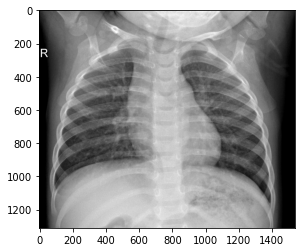

In [0]:
x_train=np.array(x_train)
y_train=np.array(y_train)
plt.imshow(x_train[1],cmap='gray')
print("Total training samples : {}".format(y_train.shape))

In [0]:
#extracting test data
x_test=[]
y_test=[]
for root,dir_,files in os.walk('test'):
  for file in files:
    img_path=os.path.join(root,file)
    identifier=os.path.basename(root)
    
    img=Image.open(img_path)
    img=np.array(img)
    x_test.append(img)
    if identifier=='PNEUMONIA':
      y_test.append(1)
    if identifier=='NORMAL':
      y_test.append(0)

Total testing samples : (624,)


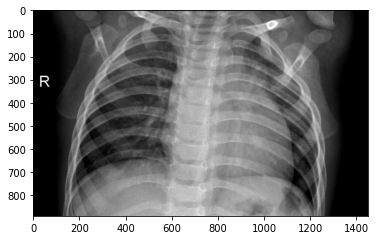

In [0]:
x_test=np.array(x_test)
y_test=np.array(y_test)
plt.imshow(x_test[0],cmap='gray')
print("Total testing samples : {}".format(y_test.shape))

In [0]:
#extracting the validation data
x_val=[]
y_val=[]
for root,dir_,files in os.walk('val'):
  for file in files:
    img_path=os.path.join(root,file)
    identifier=os.path.basename(root)
    
    img=Image.open(img_path)
    img=np.array(img)
    x_val.append(img)
    if identifier=='PNEUMONIA':
      y_val.append(1)
    if identifier=='NORMAL':
      y_val.append(0)

Validation test size : (16,)


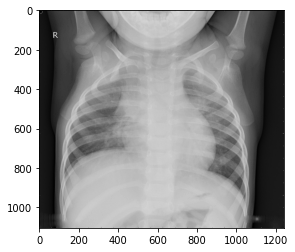

In [0]:
x_val=np.array(x_val)
y_val=np.array(y_val)
plt.imshow(x_val[0],cmap='gray')
print('Validation test size : {}'.format(x_val.shape))

In [0]:
print("Training data size : {}".format(y_train.shape))
print("Testing data size : {}".format(y_test.shape))
print("Validation data size : {}".format(x_val.shape))

Training data size : (5216,)
Testing data size : (624,)
Validation data size : (16,)


In [0]:
#the real things start here
from tensorflow.keras.preprocessing import image as tfk_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend 
import numpy as np
from PIL import Image 

In [12]:
image_width,image_height=Image.open('train/PNEUMONIA/person963_bacteria_2888.jpeg').size
print("image size : {} * {}".format(image_width,image_height))

image size : 1384 * 1376


In [0]:
#downscaling the image
image_width=128
image_height=128

In [0]:
train_data_dir='train'
test_data_dir='test'
val_data_dir='val'
num_training_samples=5216
num_testing_samples=624
num_val_samples=16

In [15]:
if backend.image_data_format()=='channels_first':
  input_shape=(3,image_width,image_height)
else:
  input_shape=(image_width,image_height,3)
print("Input shape is {} ".format(input_shape))

Input shape is (128, 128, 3) 


In [0]:
train_data_gen=tfk_img.ImageDataGenerator(rescale=1./255,zoom_range=0.3)
test_data_gen=tfk_img.ImageDataGenerator(rescale=1./255,zoom_range=0.2)

In [0]:
train_generator=train_data_gen.flow_from_directory(train_data_dir,target_size=(image_width,image_height),
                                                   batch_size=50,shuffle=True,seed=101,
                                                   classes=['PNEUMONIA','NORMAL'],class_mode='binary')
test_generator=test_data_gen.flow_from_directory(test_data_dir,target_size=(image_width,image_height),
                                                 batch_size=50,shuffle=True,seed=101,
                                                 classes=['PNEUMONIA','NORMAL'],class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [0]:
#model developing
#first layer
model=Sequential()
model.add(Conv2D(16,(3,3),strides=(2,2),activation='relu',padding='same',input_shape=(image_width,image_height,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

#second layer
model.add(Conv2D(32,(3,3),strides=(2,2),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#third layer
model.add(Conv2D(64,(3,3),strides=(2,2),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#flatten the image
model.add(Flatten())
#add a densely connected layer
model.add(Dense(units=64,activation='relu'))
model.add(Dropout(0.27))
#output layer
model.add(Dense(units=1,activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 64, 64, 16)        448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)               

In [0]:
#compiling the model
adam_opt=Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy',optimizer=adam_opt,metrics=['accuracy'])

In [0]:
import tensorflow as tf
device_name=tf.test.gpu_device_name()
print(device_name)

/device:GPU:0


In [0]:
#training the model
batch_size=50
model.fit_generator(train_generator,
                    steps_per_epoch=num_training_samples // batch_size,
                    epochs=50,
                    validation_data=test_generator,
                    validation_steps=num_testing_samples//batch_size)

Epoch 1/50
104/104 [==============================] - 73s 702ms/step - loss: 0.5100 - accuracy: 0.7660 - val_loss: 0.5096 - val_accuracy: 0.7400
Epoch 2/50
104/104 [==============================] - 73s 701ms/step - loss: 0.3460 - accuracy: 0.8519 - val_loss: 0.4270 - val_accuracy: 0.8150
Epoch 3/50
104/104 [==============================] - 72s 693ms/step - loss: 0.2901 - accuracy: 0.8788 - val_loss: 0.3447 - val_accuracy: 0.8633
Epoch 4/50
104/104 [==============================] - 72s 689ms/step - loss: 0.2805 - accuracy: 0.8806 - val_loss: 0.4577 - val_accuracy: 0.8000
Epoch 5/50
104/104 [==============================] - 72s 689ms/step - loss: 0.2404 - accuracy: 0.9011 - val_loss: 0.4429 - val_accuracy: 0.8150
Epoch 6/50
104/104 [==============================] - 73s 698ms/step - loss: 0.2246 - accuracy: 0.9090 - val_loss: 0.4707 - val_accuracy: 0.8083
Epoch 7/50
104/104 [==============================] - 72s 694ms/step - loss: 0.2249 - accuracy: 0.9069 - val_loss: 0.3907 - val_ac

In [0]:
import h5py
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
#authenciate and create PyDrive Client
auth.authenticate_user()
gauth=GoogleAuth()
gauth.credentials=GoogleCredentials.get_application_default()

In [0]:
#save the model
drive=GoogleDrive(gauth)
model.save('dhamo_pneumonia.h5')
model_file=drive.CreateFile({'title':'dhamo_pneumonia.h5'})
model_file.SetContentFile('dhamo_pneumonia.h5')

In [0]:
#download to google drive
drive.CreateFile({'id':model_file.get('id')})

GoogleDriveFile({'id': None})

In [17]:
#load the model from drive(drive have to mounted... check  the files option to mount the drive)
from tensorflow.keras.models import load_model
pneumonia_model=load_model('/content/drive/My Drive/dhamo_pneumonia.h5')

In [19]:
#weights of the  features in the model
pneumonia_model.weights

[<tf.Variable 'conv2d_3/kernel:0' shape=(3, 3, 3, 16) dtype=float32, numpy=
 array([[[[ 8.76512676e-02,  1.02261335e-01,  2.47734591e-01,
           -1.62709355e-01,  4.78632450e-02, -1.35090470e-01,
            4.00149031e-03,  1.05067445e-02,  1.02483310e-01,
            4.69073430e-02, -9.28514153e-02,  3.45961228e-02,
            2.19155669e-01,  1.33508360e-02,  1.23311721e-01,
           -1.99346304e-01],
          [ 1.43190488e-01,  9.71755907e-02,  7.72250965e-02,
           -3.64533186e-01,  1.01695880e-01, -1.91800430e-01,
           -1.84876233e-01,  1.37468949e-01, -6.96179047e-02,
            1.69665396e-01,  1.04504384e-01, -1.74066514e-01,
            1.67512044e-01, -8.92267078e-02,  1.49571925e-01,
           -8.07942078e-02],
          [ 1.41693160e-01,  3.73984277e-02, -6.35209009e-02,
           -3.20051461e-01,  9.18275490e-02,  1.18009053e-01,
           -9.90405381e-02,  2.28478298e-01,  8.30843225e-02,
            1.73848405e-01, -1.78431585e-01, -1.14775203e-01

MAKING PREDICTIONS...


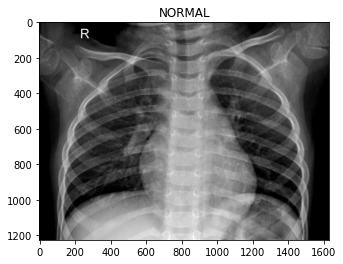

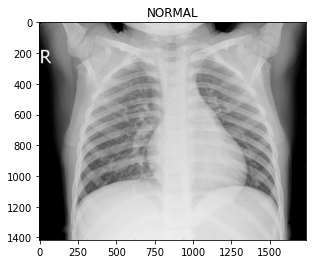

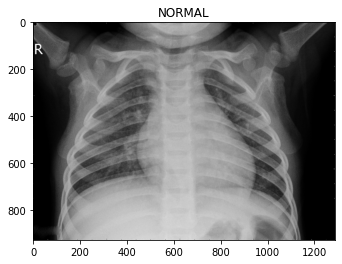

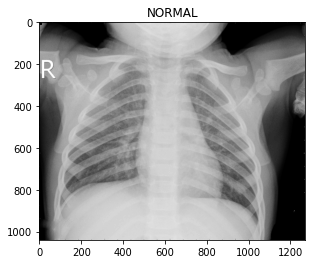

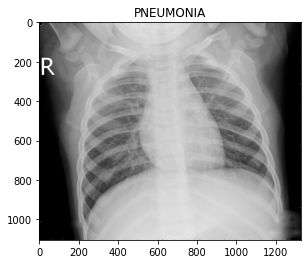

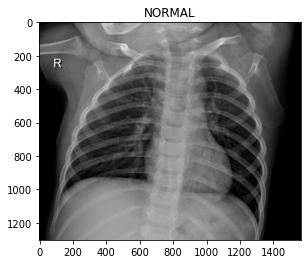

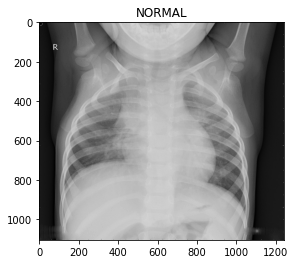

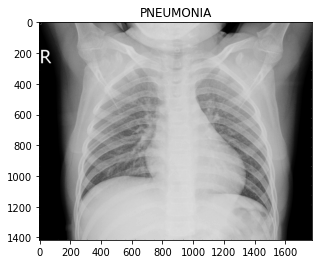

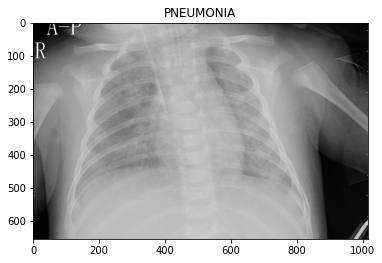

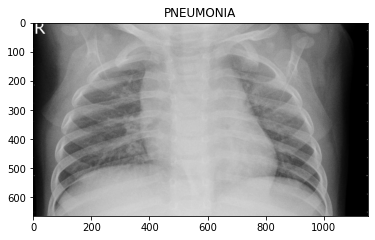

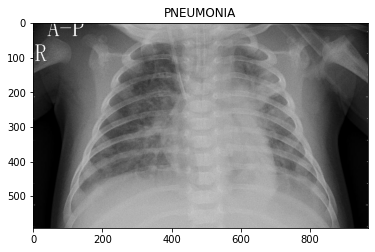

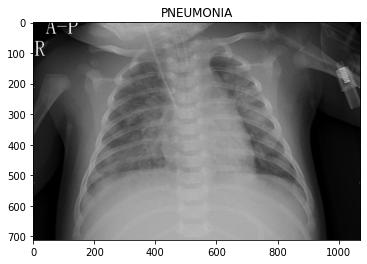

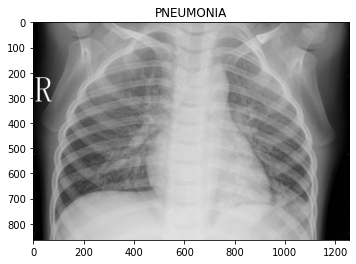

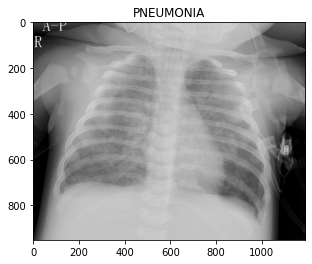

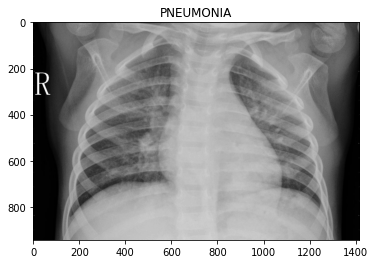

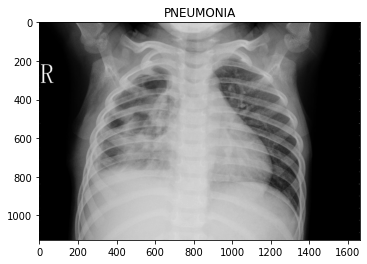

In [20]:
#make predictions with the loaded model from drive
import os
import matplotlib.pyplot as plt
print("MAKING PREDICTIONS...")
for root,dir_,files in os.walk('val'):
  for file in files:
    path=os.path.join(root,file)
    img=tfk_img.load_img(path)
    img=img.resize((128,128))
    img=tfk_img.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    result=pneumonia_model.predict(img)
    pred=''
    if result[0][0]==0:
      pred='PNEUMONIA'
      IMG=Image.open(path)
      IMG=np.array(IMG,'uint8')
      plt.imshow(IMG,cmap='gray')
      plt.title(pred)

    else:
      pred='NORMAL'
      IMG=Image.open(path)
      IMG=np.array(IMG,'uint8')
      plt.imshow(IMG,cmap='gray')
      plt.title(pred)
    plt.show()
    

In [21]:
#know the accuracy of the model classification
val_gen=tfk_img.ImageDataGenerator(rescale=1./255,zoom_range=0.2)
val_generator=test_data_gen.flow_from_directory('val',target_size=(image_width,image_height),
                                                 batch_size=1,shuffle=False,
                                                 classes=['PNEUMONIA','NORMAL'],class_mode='binary')

Found 16 images belonging to 2 classes.


In [24]:
pneumonia_model.evaluate_generator(val_generator,steps=100)

[0.9593794941902161, 0.6499999761581421]

In [25]:
print('96% of Pneumonia patient has been correctly identified as PNEUMONIA affected patients')

96% of Pneumonia patient has been correctly identified as PNEUMONIA affected patients
